In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context("poster")
sns.set_palette('Set2')

# import dataset

In [2]:
df = pd.read_feather("dataset/carUsedPrice.feather")
df["model"] = df["model"].str.strip()
df = df[df["price"]<80000]

In [3]:
df.head(4)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0


# visualize target label

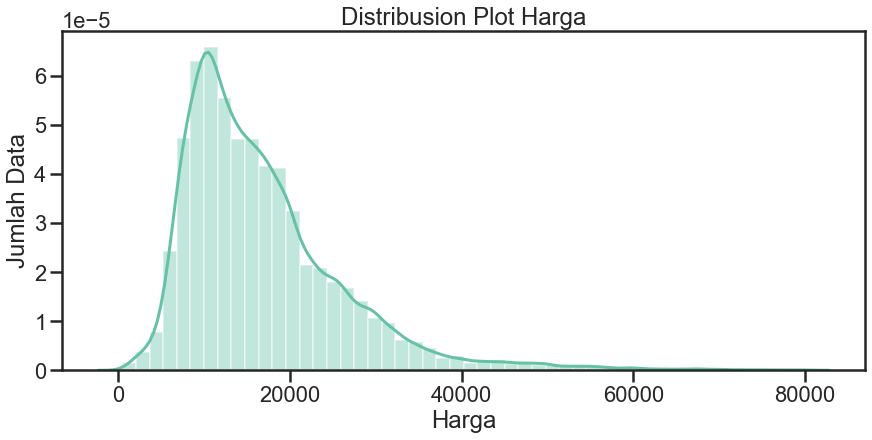

In [4]:
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)
_ = ax.set_title("Distribusion Plot Harga")
_ = sns.distplot(x=df["price"], bins=50, ax=ax);
_ = ax.set_xlabel("Harga")
_ = ax.set_ylabel("Jumlah Data")

plt.show()

# visualize kolom categori

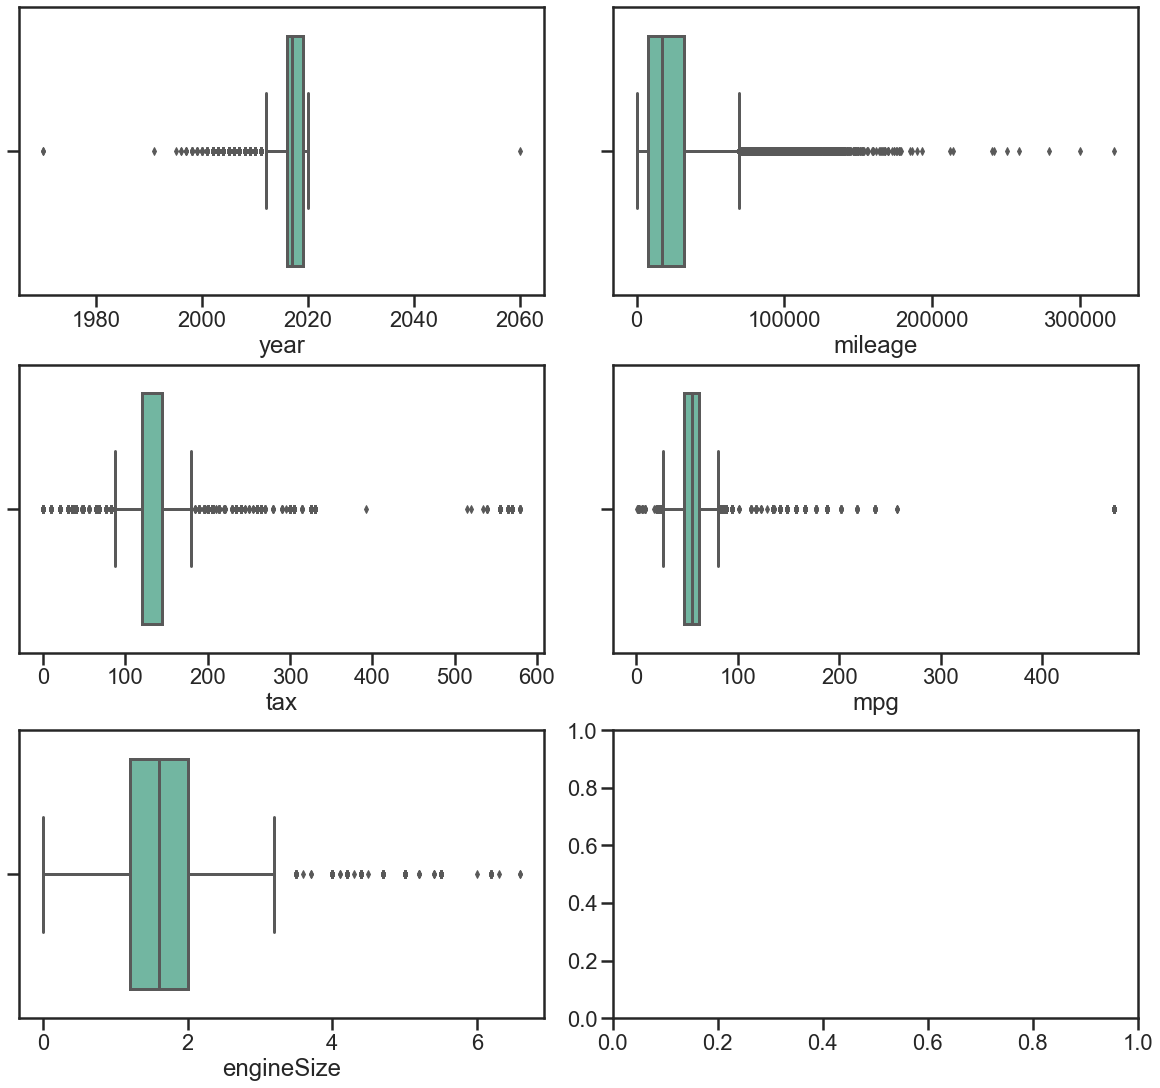

In [5]:
kolom = ["year", "mileage", "tax", "mpg", "engineSize"]

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(16, 15), constrained_layout=True)
for kolom, ax in zip(kolom, ax.flatten()):
    sns.boxplot(x=df[df["price"]<75000][kolom], ax=ax);
    
plt.show()

# Hubungan Harga dan Transmisi

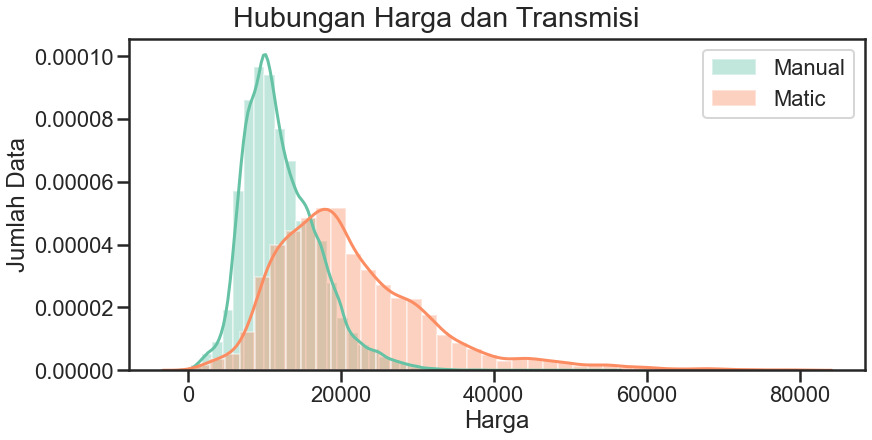

In [6]:
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

_ = fig.suptitle("Hubungan Harga dan Transmisi")
_ = sns.distplot(df[df["transmission"]=="Manual"]["price"], bins=40, label="Manual");
_ = sns.distplot(df[df["transmission"]=="Automatic"]["price"], bins=40, label="Matic");
_ = ax.set_xlabel("Harga")
_ = ax.set_ylabel("Jumlah Data")
_ = ax.legend()

plt.show()

In [7]:
df["fuelType"].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

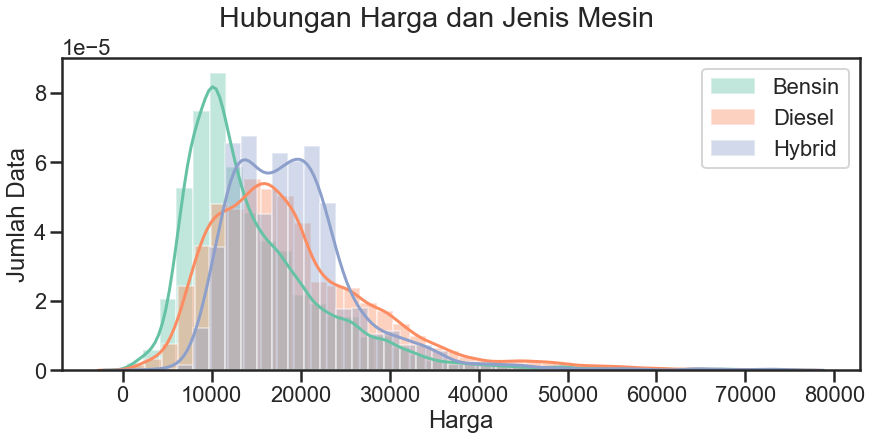

In [8]:
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

_ = fig.suptitle("Hubungan Harga dan Jenis Mesin")
_ = sns.distplot(df[(df["fuelType"]=="Petrol") & (df["price"]<75000)]["price"], bins=40, label="Bensin");
_ = sns.distplot(df[(df["fuelType"]=="Diesel") & (df["price"]<75000)]["price"], bins=40, label="Diesel");
_ = sns.distplot(df[(df["fuelType"]=="Hybrid") & (df["price"]<75000)]["price"], bins=40, label="Hybrid");
_ = ax.set_xlabel("Harga")
_ = ax.set_ylabel("Jumlah Data")
_ = ax.legend()

plt.show()

In [9]:
df[df["fuelType"].isin(["Electric"])]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
30252,Ampera,2015,12999,Automatic,34461,Electric,0.0,235.4,1.4
38942,i3,2017,18999,Automatic,20321,Electric,135.0,470.8,0.0
38967,i3,2016,18999,Automatic,9990,Electric,0.0,470.8,0.0
39402,i3,2015,17400,Automatic,29465,Electric,0.0,470.8,1.0
57086,Mondeo,2016,15975,Automatic,9396,Electric,0.0,67.3,2.0
62660,Mondeo,2016,15500,Automatic,24531,Electric,0.0,67.3,2.0
